## Dataset retrieved from kaggle.com ##

This dataset was provided by DataSnaek, you can download the dataset [here](https://www.kaggle.com/datasnaek/league-of-legends)


General Info (from dataSnaek):

"This is a collection of over 50,000 ranked games from the game League of Legends, as well as json files containing a way to convert between champion and summoner spell IDs and their names. For each game, there are fields for:

    Game ID
    Game Duration (in seconds)
    Season ID
    Winner (0 = team1, 1 = team2)
    First Baron, dragon, tower, blood, inhibitor and Rift Herald (0 = team1, 1 = team2)
    Champions and summoner spells for each team (Stored as Riot's champion and summoner spell IDs)
    The number of tower, inhibitor, Baron, dragon and Rift Herald kills each team has
    The 5 bans of each team (Again, champion IDs are used)

This dataset was collected using the Riot Games API, which makes it easy to lookup and collect information on a users ranked history and collect their games. However finding a list of usernames is the hard part, in this case I am using a list of usernames scraped from 3rd party LoL sites.

Possible Uses

There is a vast amount of data in just a single LoL game. This dataset takes the most relevant information and makes it available easily for use in things such as attempting to predict the outcome of a LoL game, analysing which in-game events are most likely to lead to victory, understanding how big of an effect bans of a specific champion have, and more."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [4]:
data.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149100e+04,5.149100e+04,51491.000000,51491.0,51491.000000,51491.000000,51491.000000,51491.000000,51491.000000,51491.000000,...,51491.000000,51491.000000,51491.000000,51491.000000,51491.00000,51491.000000,51491.000000,51491.000000,51491.000000,51491.000000
mean,3.306222e+09,1.502926e+12,1832.347012,9.0,1.493562,1.471286,1.450642,1.308462,0.926492,1.442815,...,5.549416,0.985065,0.414538,1.404362,0.24012,108.215183,107.909305,108.690839,108.624478,108.065332
std,2.946169e+07,1.978075e+09,512.025271,0.0,0.499963,0.520325,0.542849,0.676115,0.841426,0.569579,...,3.860967,1.256280,0.613765,1.224481,0.42716,102.551101,102.869919,102.591165,103.346559,102.755539
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292217e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.00000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.00000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.00000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.00000,516.000000,516.000000,516.000000,516.000000,516.000000


In [5]:
data.rename(columns={'gameDuration': 'gameLength (seconds)'}, inplace=True)

In [6]:
data['gameLength (minutes)'] = data['gameLength (seconds)'].apply(lambda x: x//60)

In [7]:
data = data[['gameId', 'gameLength (seconds)', 'gameLength (minutes)', 'seasonId', 'winner', 'firstBlood',
       'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon',
       'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id',
       't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
       't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2',
       't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4',
       't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5']]

In [8]:
data.head()

,gameId,gameLength (seconds),gameLength (minutes),seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1949,32,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1851,30,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1493,24,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1758,29,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,2094,34,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [154]:
firsts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
firstLabels = ['First Blood','First Tower', 'First Inhibitor', 'First Baron', 'First Dragon', 'First Rift Herald']
firstTotals = dataClean[firsts].apply(pd.value_counts)
newIndex = ['blue','red','neither']
firstSort = firstTotals.reindex(index=newIndex)
firstSort

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
blue,26114,25861,23054,14758,24690,12948
red,24822,24417,22160,16474,24801,12364
neither,555,1213,6277,20259,2000,26179


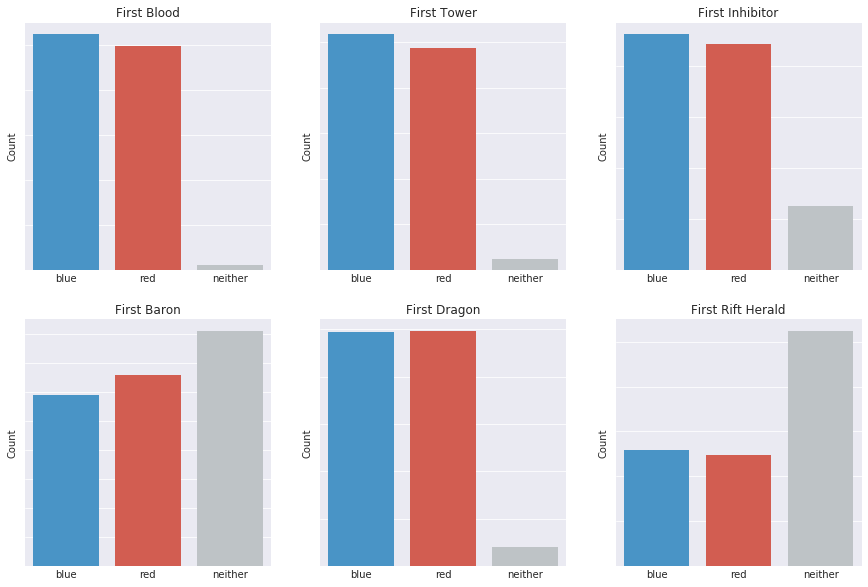

In [161]:
plotColors = ['#3498DB','#E74C3C','#BDC3C7']
nrows, ncols = 2,3
fig = plt.figure(figsize=(15,10))
for i in range(1,7):
    ax = fig.add_subplot(nrows,ncols,i)
    sns.barplot(x=firstSort.index,y=firstSort[firstSort.columns[i-1]],palette=plotColors)
    ax.set_ylabel('Count')
    ax.yaxis.set_ticklabels([])
    ax.set_title(firstLabels[i-1])

Using the JSON given to retrieve champion names

In [10]:
import json

In [11]:
jDict = pd.read_json('champion_info.json')
champInfo = pd.read_json((jDict['data']).to_json(), orient='index')
champInfo.set_index(['id'], inplace=True)
champInfo.head()

,key,name,tags,title
id,,,,
266,Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
103,Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
84,Akali,Akali,[Assassin],the Fist of Shadow
12,Alistar,Alistar,"[Tank, Support]",the Minotaur
32,Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


In [12]:
def idToName(ID, dic):
    champ = dic['name'][ID]
    return champ

In [13]:
idToName(10, champInfo)

'Kayle'

In [14]:
champCols = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']

In [15]:
banCols = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5',]

In [16]:
for c in champCols:
    data[c] = data[c].apply(lambda x: idToName(x, champInfo))

In [17]:
for c in banCols:
    data[c] = data[c].apply(lambda x: idToName(x, champInfo))

In [18]:
data[champCols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn


In [19]:
data[banCols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


In [20]:
data[champCols].describe()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
count,51491,51491,51491,51491,51491,51491,51491,51491,51491,51491
unique,138,138,138,138,138,138,138,138,138,138
top,Tristana,Thresh,Thresh,Tristana,Thresh,Tristana,Thresh,Thresh,Tristana,Thresh
freq,1299,1342,1322,1335,1287,1259,1339,1342,1348,1300


In [21]:
champInfo.set_index(['name'],inplace=True)

In [22]:
def getTag(name, data):
    tags = data['tags'][name][0]
    return tags

getTag("Rek'Sai", champInfo)

'Fighter'

In [23]:
for col in champCols:
    data[col + '_tags'] = data[col].apply(lambda x: getTag(x, champInfo))
data.head()

,gameId,gameLength (seconds),gameLength (minutes),seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1949,32,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1851,30,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1493,24,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1758,29,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,2094,34,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [24]:
sortedPick = sorted(data['t1_champ1id'])
sortedBan = sorted(data['t1_ban1'])
tagsList = data['t1_champ1id_tags']

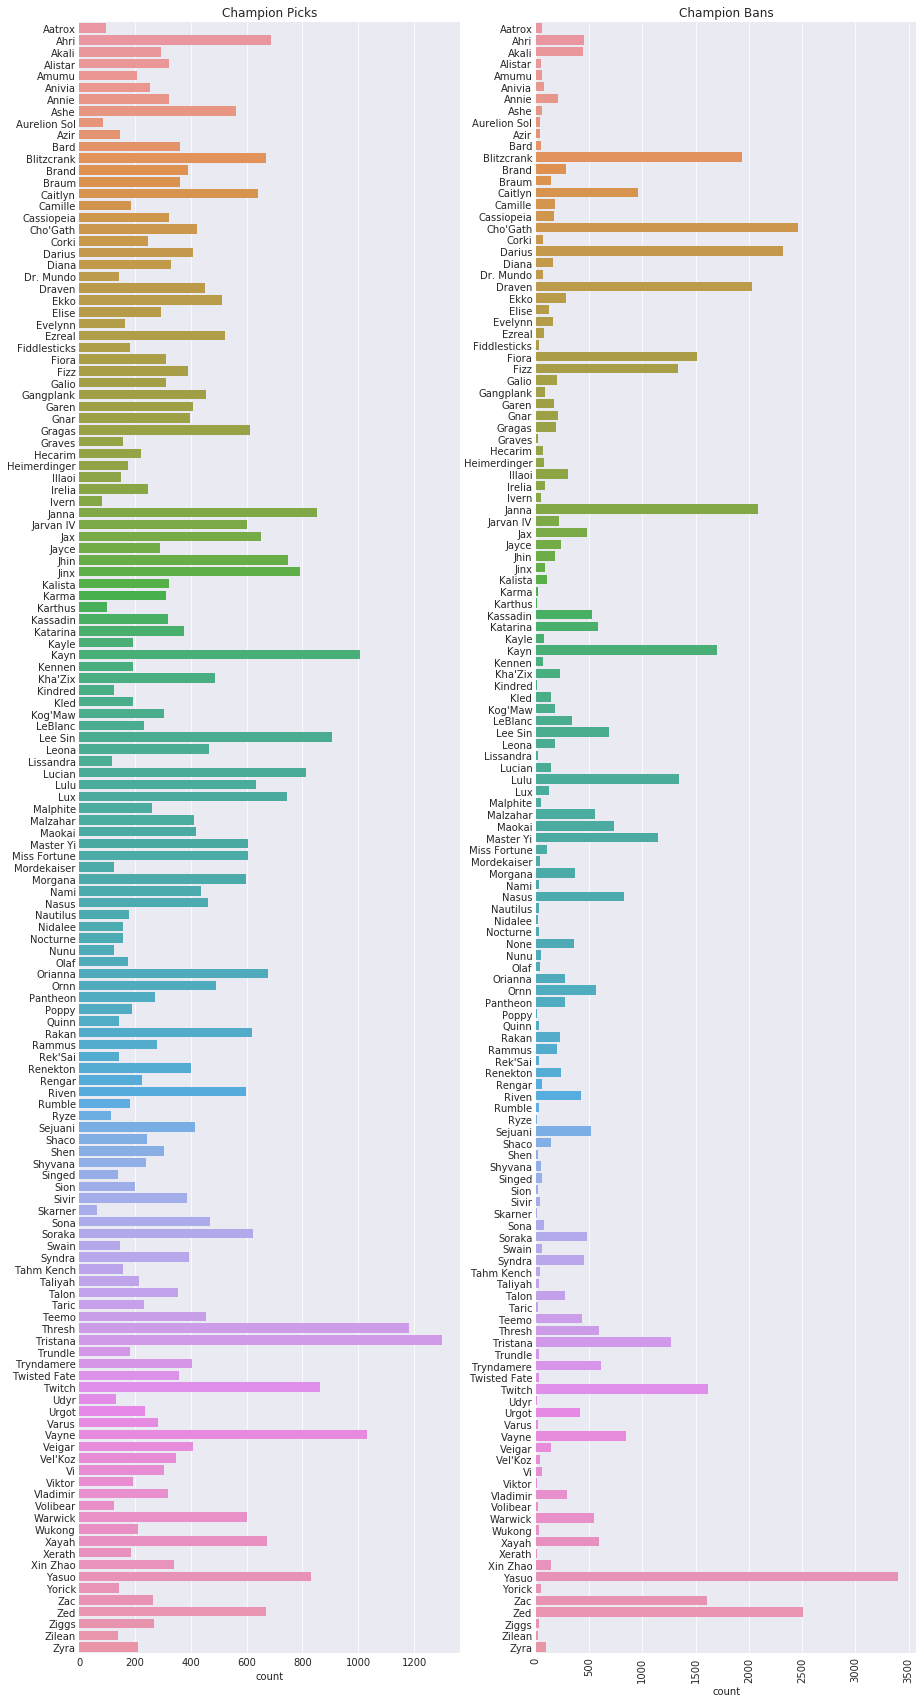

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=sortedPick, data=data, ax=ax1)
sns.countplot(y=sortedBan, data=data, ax=ax2)
ax1.set_title('Champion Picks')
ax2.set_title('Champion Bans')

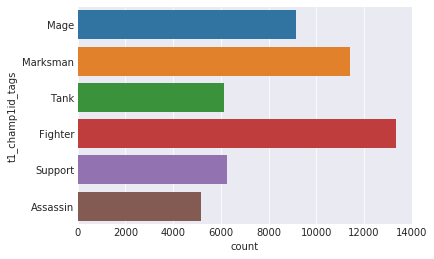

In [26]:
sns.countplot(y=tagsList, data=data)

to do:

* Order champion picks graph
* Find a way to incorporate champion types (create new dataFrame?)
* ML models on game statistics: predict outcome
* analyze champion picks vs. bans--- predict outcome
* analyze team composition and predict outcome

In [27]:
def numToColor(data):
    if data == 0:
        color = 'blue'
    else:
        color = 'red'
    return color      

In [29]:
data['winner(color)'] = data['winner'].apply(lambda x: numToColor(x))
data.head()

,gameId,gameLength (seconds),gameLength (minutes),seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags,winner(color)
0,3326086514,1949,32,9,1,2,1,1,1,1,...,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support,red
1,3229566029,1851,30,9,1,1,1,1,0,1,...,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter,red
2,3327363504,1493,24,9,1,2,1,1,1,2,...,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman,red
3,3326856598,1758,29,9,1,1,1,1,1,1,...,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman,red
4,3330080762,2094,34,9,1,2,1,1,1,1,...,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman,red


In [162]:
dataClean = data.replace([0,1,2],['neither','blue','red'])
dataClean.head()

,gameId,gameLength (seconds),gameLength (minutes),seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags,winner(color)
0,3326086514,1949,32,9,blue,red,blue,blue,blue,blue,...,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support,red
1,3229566029,1851,30,9,blue,blue,blue,blue,neither,blue,...,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter,red
2,3327363504,1493,24,9,blue,red,blue,blue,blue,red,...,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman,red
3,3326856598,1758,29,9,blue,blue,blue,blue,blue,blue,...,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman,red
4,3330080762,2094,34,9,blue,red,blue,blue,blue,blue,...,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman,red
